# Lending Club Case study
>Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

## Table of contents
* [General Info](#general-information)
* [Technologies Used](#technologies-used)
* [Conclusions](#conclusions)
* [Acknowledgements](#acknowledgements)

## General Information
- Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.
- The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## Dataset

The dataset provided contains data for 39,717 borrowers and 111 variables related to each borrower. The Dataset and the data dictionary is provided in the github repository.



## Technologies Used
- Library - numpy  1.20.3
- Library - pandas 1.3.4
- Library - matplotlib  3.4.3
- Library - seaborn  0.11.2
- Library - plotly  5.6.0

## Data exploration and preprocessing
Lets import the necessary libraries and dataset riquired

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df= pd.read_csv('loan.csv')

C:\Users\nikhi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##### Let’s go ahead and check for missing values in our dataset.

In [2]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

##### We can see that multiple columns have have all null values so they are of no use for use to us, so we can drop these columns

In [3]:
df=df.drop(['mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'],axis=1)

In [4]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... recoveries  \
0   10.65%       162.87     B        B2  ...       0.00   
1   15.27%        59.83     C        C4  ...     117.08   
2   15.96%        84.33     C        C5  ...       0.00   
3   13.49%       339.31     C        C1  ...       0.00   
4   12.69%        67.79     B        B5  ...       0.00   

  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                    0.00       Jan-15           171.62          NaN   
1                    1.11       Apr-13           119.66          NaN   
2                    0.00       Jun-14           649.91          NaN   
3                    0.00       Jan-15           357.48          NaN   
4                    0.00       May-16            67.79       Jun-16   

  last_credit_pull_d collections_12_mths_ex_med policy_code application_type  \
0             May-16                        0.0           1       INDIVIDUAL   
1             Sep-13                        0.0           1       INDIVIDUAL   
2             May-16                        0.0           1       INDIVIDUAL   
3             Apr-16                        0.0           1       INDIVIDUAL   
4             May-16                        0.0           1       INDIVIDUAL   

  pub_rec_bankruptcies  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 53 columns]

##### We will also have to drop unwanted columns like 'id', 'member_id', 'url' etc

In [5]:
df=df.drop(['id','member_id','pymnt_plan','url','desc','delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med'],axis=1)

In [6]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade                 emp_title emp_length  ... addr_state    dti  \
0     B        B2                       NaN  10+ years  ...         AZ  27.65   
1     C        C4                     Ryder   < 1 year  ...         GA   1.00   
2     C        C5                       NaN  10+ years  ...         IL   8.72   
3     C        C1       AIR RESOURCES BOARD  10+ years  ...         CA  20.00   
4     B        B5  University Medical Group     1 year  ...         OR  17.94   

  open_acc pub_rec revol_bal revol_util total_acc policy_code  \
0        3       0     13648     83.70%         9           1   
1        3       0      1687      9.40%         4           1   
2        2       0      2956     98.50%        10           1   
3       10       0      5598        21%        37           1   
4       15       0     27783     53.90%        38           1   

  application_type  pub_rec_bankruptcies  
0       INDIVIDUAL                   0.0  
1       INDIVIDUAL                   0.0  
2       INDIVIDUAL                   0.0  
3       INDIVIDUAL                   0.0  
4       INDIVIDUAL                   0.0  

[5 rows x 28 columns]

In [7]:
df.isnull().sum()


loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
policy_code                0
application_type           0
pub_rec_bankruptcies     697
dtype: int64

##### From the above data we can asume that the null values in 'emp_length' can be considered of the customers which are not employed.

### Checking for any outliers

In [8]:
df.describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  39717.000000  39717.000000     39717.000000  39717.000000   
mean   11219.443815  10947.713196     10397.448868    324.561922   
std     7456.670694   7187.238670      7128.450439    208.874874   
min      500.000000    500.000000         0.000000     15.690000   
25%     5500.000000   5400.000000      5000.000000    167.020000   
50%    10000.000000   9600.000000      8975.000000    280.220000   
75%    15000.000000  15000.000000     14400.000000    430.780000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti      open_acc       pub_rec      revol_bal  \
count  3.971700e+04  39717.000000  39717.000000  39717.000000   39717.000000   
mean   6.896893e+04     13.315130      9.294408      0.055065   13382.528086   
std    6.379377e+04      6.678594      4.400282      0.237200   15885.016641   
min    4.000000e+03      0.000000      2.000000      0.000000       0.000000   
25%    4.040400e+04      8.170000      6.000000      0.000000    3703.000000   
50%    5.900000e+04     13.400000      9.000000      0.000000    8850.000000   
75%    8.230000e+04     18.600000     12.000000      0.000000   17058.000000   
max    6.000000e+06     29.990000     44.000000      4.000000  149588.000000   

          total_acc  policy_code  pub_rec_bankruptcies  
count  39717.000000      39717.0          39020.000000  
mean      22.088828          1.0              0.043260  
std       11.401709          0.0              0.204324  
min        2.000000          1.0              0.000000  
25%       13.000000          1.0              0.000000  
50%       20.000000          1.0              0.000000  
75%       29.000000          1.0              0.000000  
max       90.000000          1.0              2.000000

No outliers can be found in the above data

### Cleaning the data

 Observing the 'loan_status' column we can see there are 3 values, namely 'Charged off', 'Fully paid' and 'Current'. The problem statement is to find out the potential customers which are going to default before giving them the loan, so the customers which are currently paying the debts are of no use to us. We only need the customer data who are charged off and who have fully paid.

In [9]:
df=df[df['loan_status']!='Current']

### Transforming Data

As we have only 2 variables in 'loan_status' we can convert it to 0's or 1's  
0 = 'Charged off'  
1 = 'Fully Paid'

In [10]:
df['loan_status']=df['loan_status'].apply(lambda x: 0 if x=='Charged Off' else 1)

Converting 'emp_length' to integer value from a string value  
-1 = Not employed    
0 = Employed for less than 1 year  
1 = Employed for or more than 1 year
and so on....


In [11]:
df['emp_length']=df['emp_length'].apply(lambda x:str(x))
df['emp_length']=df['emp_length'].apply(lambda x: 0 if '<' in x else x[:2])
df['emp_length']=df['emp_length'].apply(lambda x: -1 if x=='na' else int(x))

Converting 'int_rate' to float from String

In [12]:
df['int_rate']=df['int_rate'].apply(lambda x:float(x[:-1]))

Renaming 'term' to 'term_months' and converting it to integer from String

In [13]:
df.rename(columns={'term':'term_months'}, inplace=True)
df['term_months']=df['term_months'].apply(lambda x:int(x[:3]))

### Understanding data

Given the nature of our dataset, we’d expect that we’re dealing with an imbalanced classification problem, meaning that we have considerably more non-default cases than default cases. Using the code below, we confirm that this is indeed the case with 85.41% of our dataset containing non-default cases.

In [14]:
#Percentage of non-default cases
data0=(df[df.loan_status == 1].loan_status.count() / df.loan_status.count())*100
data0

85.41358840760039

With this in mind, we’ll now further explore how loan status is related to other variables in our dataset.

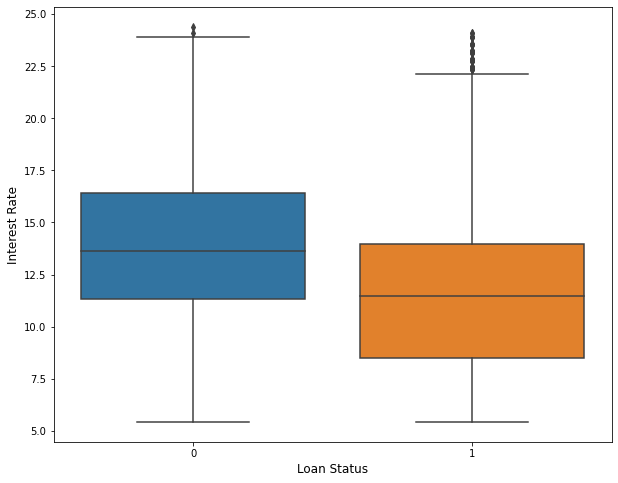

In [15]:
plt.figure(figsize=[10,8])
p=sns.boxplot(x=df['loan_status'],y=df['int_rate'])
p.set_xlabel("Loan Status", fontsize = 12)
p.set_ylabel("Interest Rate", fontsize = 12)
plt.show()

You can clearly see that the customers which have higher interest rate have higher chance to default.

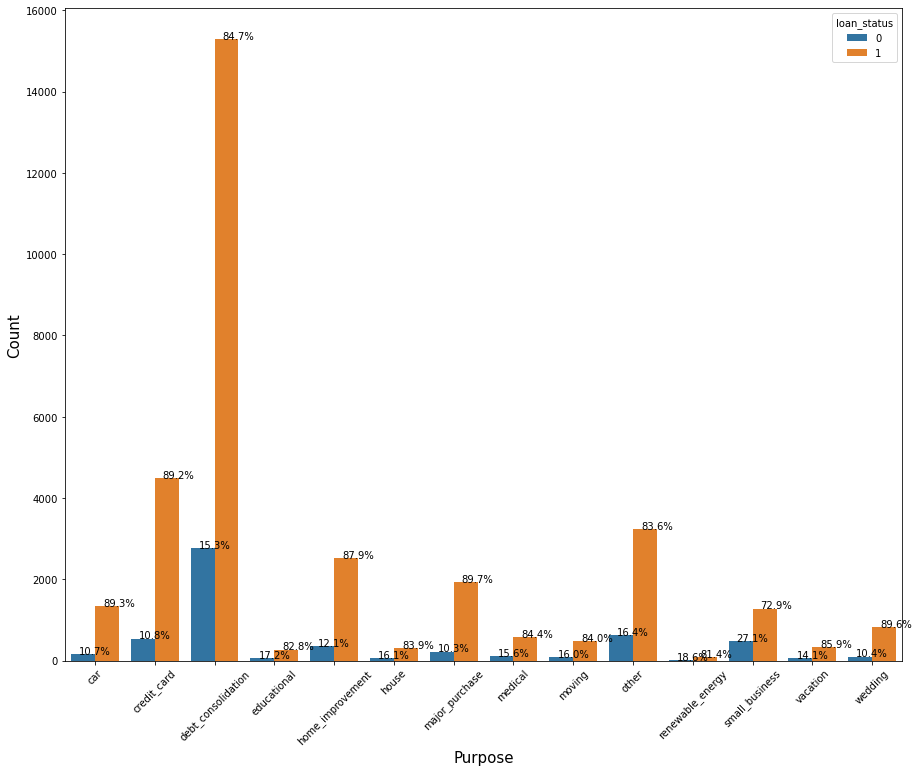

In [16]:
total_purpose=[]
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[0]+df.groupby(['purpose','loan_status'])['purpose'].count()[1])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[2]+df.groupby(['purpose','loan_status'])['purpose'].count()[3])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[4]+df.groupby(['purpose','loan_status'])['purpose'].count()[5])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[6]+df.groupby(['purpose','loan_status'])['purpose'].count()[7])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[8]+df.groupby(['purpose','loan_status'])['purpose'].count()[9])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[10]+df.groupby(['purpose','loan_status'])['purpose'].count()[11])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[12]+df.groupby(['purpose','loan_status'])['purpose'].count()[13])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[14]+df.groupby(['purpose','loan_status'])['purpose'].count()[15])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[16]+df.groupby(['purpose','loan_status'])['purpose'].count()[17])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[18]+df.groupby(['purpose','loan_status'])['purpose'].count()[19])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[20]+df.groupby(['purpose','loan_status'])['purpose'].count()[21])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[22]+df.groupby(['purpose','loan_status'])['purpose'].count()[23])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[24]+df.groupby(['purpose','loan_status'])['purpose'].count()[25])
total_purpose.append(df.groupby(['purpose','loan_status'])['purpose'].count()[26]+df.groupby(['purpose','loan_status'])['purpose'].count()[27])
plt.figure(figsize=[15,12])
ax=sns.countplot(x=df.purpose,order=['car','credit_card','debt_consolidation','educational','home_improvement','house','major_purchase','medical','moving','other','renewable_energy','small_business','vacation','wedding'], hue=df['loan_status'])
ax.set_xticklabels(labels=['car','credit_card','debt_consolidation','educational','home_improvement','house','major_purchase','medical','moving','other','renewable_energy','small_business','vacation','wedding'], rotation=45)
cnt=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_purpose[cnt])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    if cnt<13:
        cnt+=1
    else:
        cnt=0
ax.set_xlabel("Purpose", fontsize = 15)
ax.set_ylabel("Count", fontsize = 15)        
plt.show()


From the bar graph we can clearly say that the loan taken for small business purpose is the most riskier followed by renewable  energy, education and so on.

In [17]:
fig = px.box(df, x='grade', y='dti', color='loan_status')
fig.show()

You can see that in the grades A, B and C the customers who default have majourly high mean dti, whereas in the remaining grades it is fairly equal.  


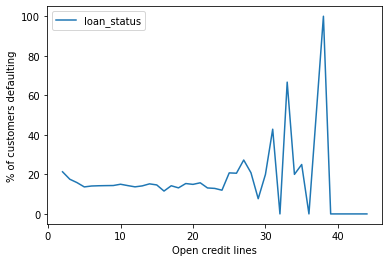

In [18]:
table1=pd.pivot_table(df,index='open_acc', values='loan_status', aggfunc=len)
table2=pd.pivot_table(df,index='open_acc', values='loan_status', aggfunc=sum)
table3=((table1-table2)/table1)*100
table3.plot()
plt.xlabel("Open credit lines")
plt.ylabel("% of customers defaulting")
plt.show()

You can clearly see that customers with 25 or higher open credit lines are more likely to default

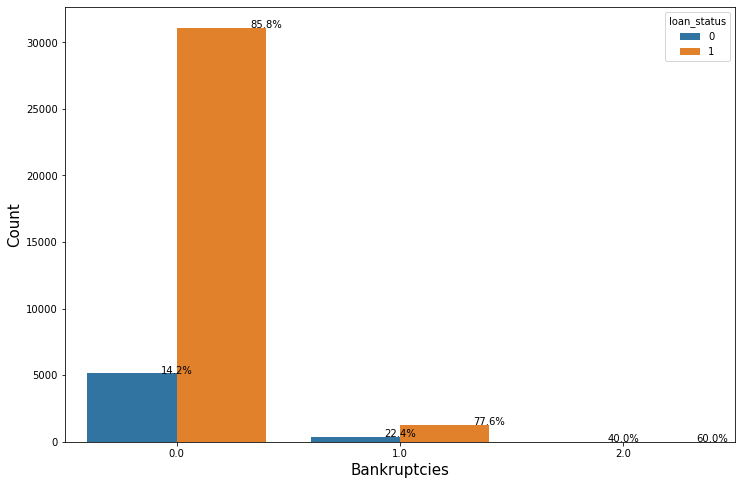

In [19]:

total=[]
total.append(df.groupby(['pub_rec_bankruptcies','loan_status'])['pub_rec_bankruptcies'].count()[0,0]+df.groupby(['pub_rec_bankruptcies','loan_status'])['pub_rec_bankruptcies'].count()[0,1])
total.append(df.groupby(['pub_rec_bankruptcies','loan_status'])['pub_rec_bankruptcies'].count()[1,0]+df.groupby(['pub_rec_bankruptcies','loan_status'])['pub_rec_bankruptcies'].count()[1,1])
total.append(df.groupby(['pub_rec_bankruptcies','loan_status'])['pub_rec_bankruptcies'].count()[2,0]+df.groupby(['pub_rec_bankruptcies','loan_status'])['pub_rec_bankruptcies'].count()[2,1])
plt.figure(figsize=[12,8])
ax=sns.countplot(x=df['pub_rec_bankruptcies'], hue=df['loan_status'])
cnt=0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total[cnt])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    if cnt<2:
        cnt+=1
    else:
        cnt=0
ax.set_xlabel("Bankruptcies", fontsize = 15)
ax.set_ylabel("Count", fontsize = 15) 
plt.show()


Here it is clear that more the number of bankruptcies more is the risk of getting defaulted

In [20]:
table1=pd.pivot_table(df,index='emp_length',columns='purpose', values='loan_status', aggfunc=len)
table2=pd.pivot_table(df,index='emp_length',columns='purpose', values='loan_status', aggfunc=sum)
table3=((table1-table2)/table1)*100
display(table3)
print('Percentage of customers defaulting')
table3.to_csv('table3.csv')

purpose           car  credit_card  debt_consolidation  educational  \
emp_length                                                            
-1           9.803922    25.000000           23.157895    50.000000   
 0          12.429379     9.000000           14.484127    18.571429   
 1          12.500000     8.459870           14.843750    11.111111   
 2           7.096774     8.576642           13.584531    17.391304   
 3          11.564626     9.960938           14.095035    26.923077   
 4          12.000000    10.937500           13.482428    27.272727   
 5           9.448819    13.164557           14.538310    17.391304   
 6          10.869565    12.454212           15.498155     0.000000   
 7          14.285714    13.100437           16.125150    11.111111   
 8           8.620690     9.580838           15.266106     0.000000   
 9           6.250000     8.426966           15.462185    11.111111   
 10         10.457516    11.305147           17.404203    10.526316   

purpose     home_improvement      house  major_purchase    medical     moving  \
emp_length                                                                      
-1                 18.888889   0.000000       15.714286  20.000000  33.333333   
 0                 15.178571  14.285714       11.026616  19.480519  14.285714   
 1                 18.367347  15.625000       10.752688  18.333333  19.672131   
 2                 11.347518  21.568627        9.504132  13.157895  15.625000   
 3                  9.523810   7.317073       13.061224  15.151515  11.666667   
 4                 11.013216  15.151515        8.290155  12.280702  16.981132   
 5                 13.389121   6.666667       11.458333  12.765957  20.000000   
 6                  8.588957  28.571429       10.655738  15.151515   7.407407   
 7                 12.500000  25.000000        4.878049  21.428571  10.000000   
 8                  8.823529  23.076923        6.756757  21.428571  28.571429   
 9                 11.224490  11.111111        9.259259   0.000000  20.000000   
 10                11.643836  19.736842        9.836066  14.792899  11.428571   

purpose         other  renewable_energy  small_business   vacation    wedding  
emp_length                                                                     
-1          24.342105         12.500000       29.545455  11.111111  30.769231  
 0          14.785992          0.000000       26.406926  25.000000   8.396947  
 1          15.363128         28.571429       30.357143   0.000000   3.529412  
 2          17.567568         14.285714       22.000000   9.375000  11.811024  
 3          16.489362         36.363636       26.829268   7.894737  10.071942  
 4          16.825397         42.857143       31.410256  12.195122   6.741573  
 5          14.046823         20.000000       27.480916  10.810811  14.705882  
 6          16.022099          0.000000       21.348315  21.052632   9.259259  
 7          16.770186         18.181818       23.170732  35.714286   8.108108  
 8          14.960630         50.000000       31.147541  20.000000   8.695652  
 9          11.403509          0.000000       18.750000  18.750000   5.555556  
 10         17.233010         14.285714       29.498525  13.829787  15.740741

Percentage of customers defaulting


The above table is the percentage of customers defaulting with respect to employment length and purpose (-1 emp_length means not employed).  
- Here you can see the maximum customers defaulting are those who are not employed(-1).
- Customers taking education loan with less years of emplyment (less than 5) are more likely to default.
- Customers taking loan for home improvements with less than 2 years of employment are more likely to default.
- As discussed earlier small business loans are the riskiest.
- Customers taking vacation loan with more than 6 years of employment tend to default more than others.
- Customers taking wedding loan with more than 10 years of employment tend to default more than others.


## Conclusion
To summarize, the major factors on which we can predict if the customer will default or not on giving them loan are​

- High interest rates​

- Small business loan​

- High open credit lines​

- Number of bankruptcies​

- Those who are not Employed​

- Customers taking education loan with less years of employment

## Contact
Created by https://github.com/nikhil-1810 - feel free to contact me!